# First task
The first task of this Project Work consists in the analysis of a dataset of apples' fotos.
In the specific the goals are:
*   Outline the fruit by generating a binary mask
*   Search for the defects on each fruit

## Step 1 - Binarization
The initial requirement was the fruits analysis for the identification of their outlines and surface defects. <br>
To do this was necessary to separate the fruit from the background, which is done by the **binarization of the image** , that consists in converting the grayscale image into a binary one (***background/foreground***). <br> 

![Binarization_1](./First_task/results/Binarized%20image_1.png)
![Binarization_2](./First_task/results/Binarized%20image_2.png)
![Binarization_3](./First_task/results/Binarized%20image_3.png)

One of the most popular techniques for finding the threshold for binarisation is the Otsu algorithm, but the results were not satisfactory. Instead, the threshold was chosen more dynamically, using the median value of the pixels of the image considered and dividing this value by 2.

## Step 2 - Segmentation
After the binarization of the image to separate the fruit from the background, the next step was to delineate the boundaries of the fruit. <br>

By isolating the largest connected component, it was possible to extract the main body of the fruit, while discarding any small noise or artefacts in the image. <br> This approach ensures robustness in detecting the overall structure of the fruit, laying the foundation for subsequent identification and analysis of defects.

![Segmentation_1](./First_task/results/Masked%20image_1.png)
![Segmentation_2](./First_task/results/Masked%20image_2.png)
![Segmentation_3](./First_task/results/Masked%20image_3.png)

## Step 3 - Smoothing
This step consist in the smoothing of the image in order to remove any noise remaining despite the previous manipulations and to prepare the image for the next steps.<br>

To do this, it was decided to use the **Bilateral Filter**, as it is an edge preserving filter. <br>
The bilateral filter achieves this balance by considering both spatial proximity and intensity differences between pixels. In this way it is able to selectively smooth out image regions while preserving important edge details. As a result, the overall structure of the fruit remains intact, facilitating more accurate edge detection.

![Original_1](./First_task/images/C0_000001.png)
![Blurried_1](./First_task/results/Blurred%20image_1.png)

![Original_2](./First_task/images/C0_000002.png)
![Blurried_2](./First_task/results/Blurred%20image_2.png)

![Original_3](./First_task/images/C0_000003.png)
![Blurried_3](./First_task/results/Blurred%20image_3.png)

## Step 4 - Edge detection
This step involves the detection of the edges in the fruit image. <br> 
For this task, the **Canny Edge Detection** algorithm was used. This choice has been made since this approach guarantees robustness, precision and got only one response to one edge. <br>
In this way it was possible to have the outline of the apple and of other interesting parts.

![Edge_1](./First_task/results/Edge%20detected%20image_1.png)
![Edge_2](./First_task/results/Edge%20detected%20image_2.png)
![Edge_3](./First_task/results/Edge%20detected%20image_3.png)

## Step 5 - Fruit isolation
In this step the background mask is created by inverting the filled image. This mask essentially highlights the areas that are not part of the fruit. 

After that, the background mask is dilated with a 5x5 kernel. Dilation is a morphological operation that makes the boundaries of the objects brighter. In this case, it is used to increase the outer edge of the fruit to make sure only the interior features are left inside. <br>
Subsequently, the dilated background mask is subtracted from the Canny edge-detected image. This operation effectively removes the external contour of the fruit, leaving behind only the internal edges and details (now visible in the images in white). <br>
Finally, the resulting figure is morphologically closed with a circular structuring element of size 40x40. Closing is a morphological operation that gets rid of small gaps and attests the closure of the edges. It ultimately serves to make the edge of the fruit smoother and more complete, fitting to be analyzed further.

![New_edges_1](./First_task/results/New_edge_1.png)
![New_edges_2](./First_task/results/New_edge_2.png)
![New_edges_3](./First_task/results/New_edge_3.png)



## Step 6 - Defects identification
In this last step a connected components labeling operation is performed on the closed image to detect defects. <br> 
This operation assigns a unique label to each connected component in the image to identificate and analyze the individual defects.

The fruit outline is then outlined using the binary mask obtained from the previous steps to provide a visual reference for the location and extent of the fruit within the image.

Next, defects are identified by isolating them during the iteration over the detected components. For each labeled component, the corresponding defect is isolated and analyzed using the draw_defect function, that highlights the defect within the original image.

![Final_result_1](./First_task/results/Final_1.png)
![Final_result_2](./First_task/results/Final_2.png)
![Final_result_3](./First_task/results/final_3.png)

# Code

In [1]:
import cv2
import numpy as np
from tools import array_of_images, get_threshold, show_images, fill_element, get_component, draw_defect, draw_fruit_outline

In [2]:
image_path = "./First_task/images"
gray_images, color_images = array_of_images(image_path)

In the image 01 the system detected 2 defect(s)
In the image 02 the system detected 1 defect(s)
In the image 03 the system detected 1 defect(s)


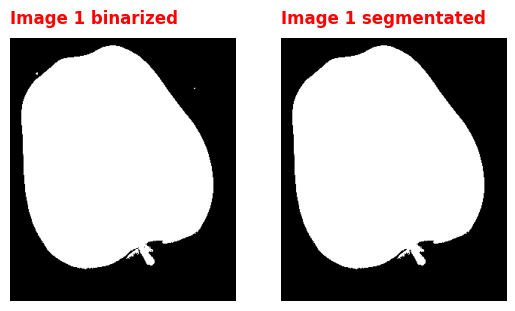

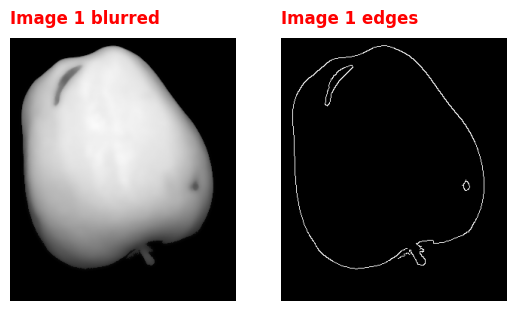

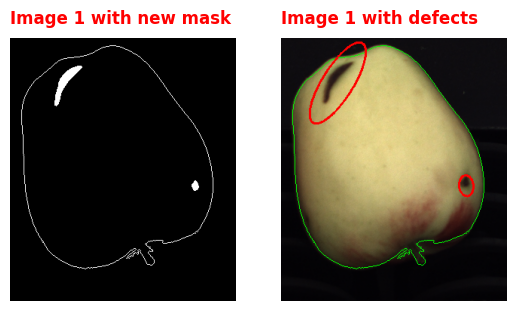

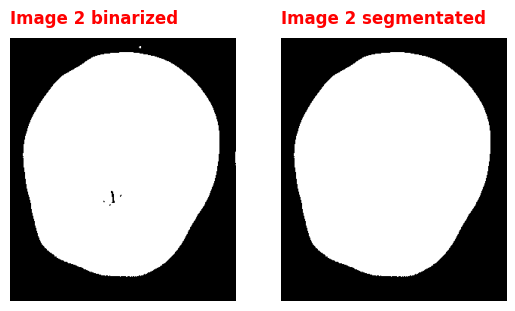

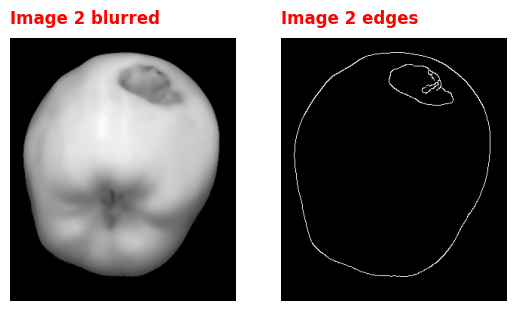

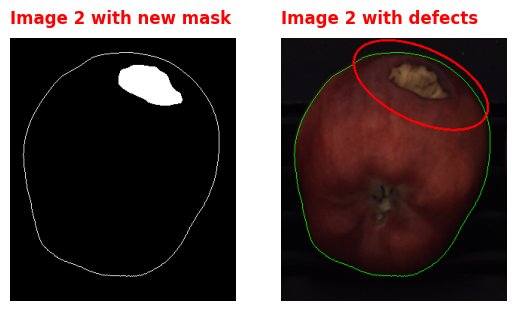

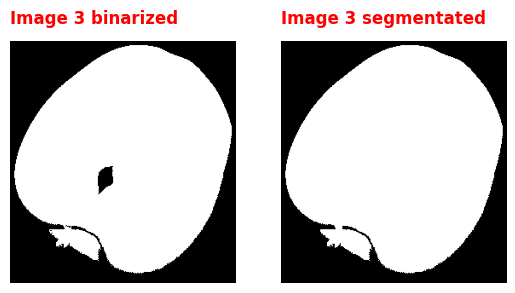

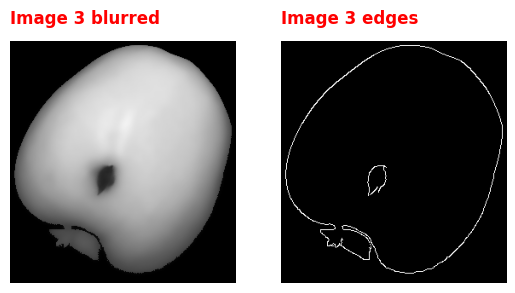

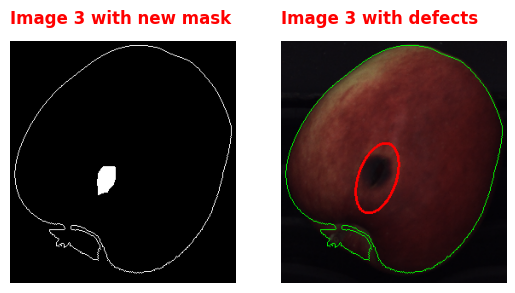

In [3]:
image_count = 1
for i in range(len(gray_images)):
    gray_image = gray_images[i]
    color_image = color_images[i]

    # Convert image to grayscale
    gray = cv2.cvtColor(gray_image, cv2.COLOR_RGB2GRAY)

    #STEP 1 - BINARIZATION
    # Calculate the adaptive threshold as  median / 2' 
    median = get_threshold(gray)

    # Binarize the image to separate foreground and background
    threshold, binarized = cv2.threshold(gray, median, 255, cv2.THRESH_BINARY)

    #Step 2 - SEGMENTATION
    # Find the fruit in the image as it is the biggest connencted component
    filled_image = fill_element(binarized)

    show_images("Image " + str(image_count) + " binarized", "Image " + str(image_count) + " segmentated", binarized, filled_image)

    #Step 3 - SMOOTHING
    # Get grayscale fruit from filled mask
    fruit = cv2.bitwise_and(gray_image, gray_image, mask=filled_image)
    #Blurred image with the bilateral filter, that is an edge-preserving filter
    blurred_image = cv2.bilateralFilter(fruit, 11, 100, 75)

    #Step 4 - EDGE DETECTION
    #Use une of the most used, Canny edge detector
    canny_image = cv2.Canny(blurred_image, 0, 140)

    show_images("Image " + str(image_count) + " blurred", "Image " + str(image_count) + " edges", blurred_image, canny_image)

    #Step 5 - FRUIT ISOLATION 
    # Get background mask by inverting fruit mask, that is given by the identification of the connencted component 
    background = 255 - filled_image

    # Dilate background mask to cut out the external edge
    kernel = np.ones((5, 5), np.uint8)
    background_dilated = cv2.dilate(background, kernel, iterations=3)
    # Remove external fruit contour
    defects = cv2.subtract(canny_image, background_dilated)

    # New edges are found by closing the figure
    structuringElement = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (40, 40))
    closed = cv2.morphologyEx(defects, cv2.MORPH_CLOSE, structuringElement)
    
    #Step 6 - DEFECTS IDENTIFICATION    
    # Perform a connected components labeling to detect defects
    #This is done to find all possible defect in the same image
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(closed, 4)

    original = color_image.copy()

    # Outline the fruit using the binary mask
    draw_fruit_outline(original, filled_image, 1)

    #Identification of the defects by isolating them when iterating over the detected components
    defects_counter = 0
    for j in range(1, retval):
        component = get_component(labels, j)
        defects_counter += draw_defect(original, component, 2, 2.2, 20, float("inf"), 5)

    display_gray = closed.copy()
    draw_fruit_outline(display_gray, filled_image, 1, (255, 255, 255))

    show_images("Image " + str(image_count) + " with new mask", "Image " + str(image_count) + " with defects", display_gray, original)

    #RECAP
    print("In the image 0" + str(image_count) + " the system detected " + str(defects_counter) + " defect(s)")
    image_count += 1
    
